# Example notebook for generating masks with pyMOE 

In the following we exemplify how to generate masks using the generate module:
* Circular aperture (binary + save into image file) 
* Rectangular aperture  (binary + save into image file)
* Fresnel Zone Plate (binary + save into image file)
* Fresnel lens (with arbitrary number of layers + save into GDSII file using gds_klops module) 
* Arbitrary phase function (with arbitrary number of layers + save into GDSII file using gds_klops module) 

In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')
sys.path.insert(0,'../../..')

from matplotlib import pyplot as plt 

## Circular aperture 

In [2]:
import pyMOE as moe 
import pyMOE.generate as gen 
import pyMOE.export as exp 

<IPython.core.display.Javascript object>


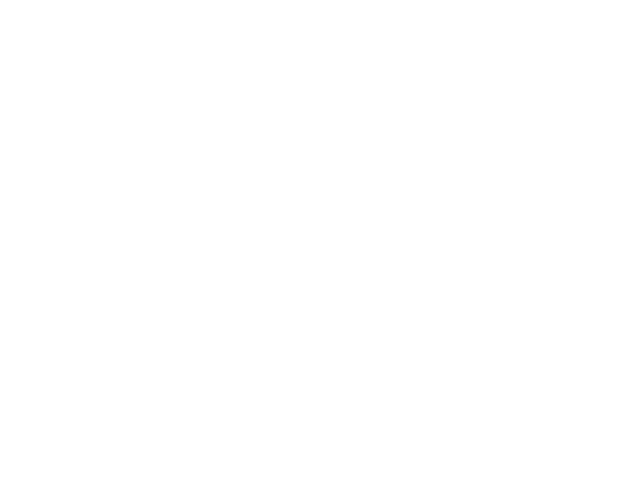

<IPython.core.display.Javascript object>


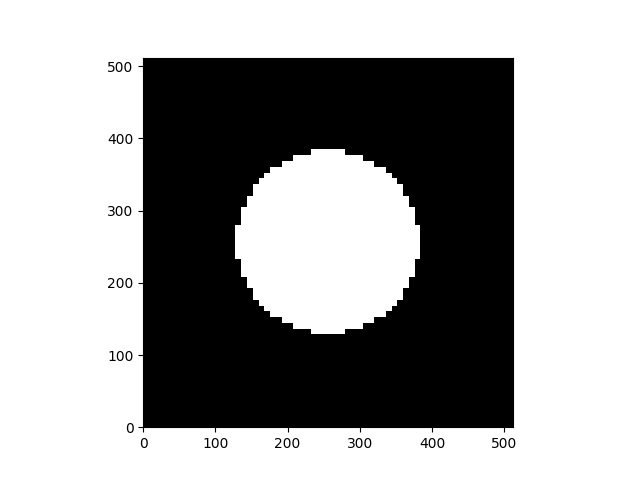

In [3]:
#make circular apertures (returns also the 2D array)
npix =64
xsiz =512
ysiz = 512

#DIAMETER (not radius)  in spatial units
#centered points 
#review the name of variables? 

circ = moe.gen.circ_mask(npix, xsiz, ysiz, partial =0.25, filename = "circ.png" ,plotting=True )
#circ2 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = "circ2.png" ,plotting=True )


<IPython.core.display.Javascript object>


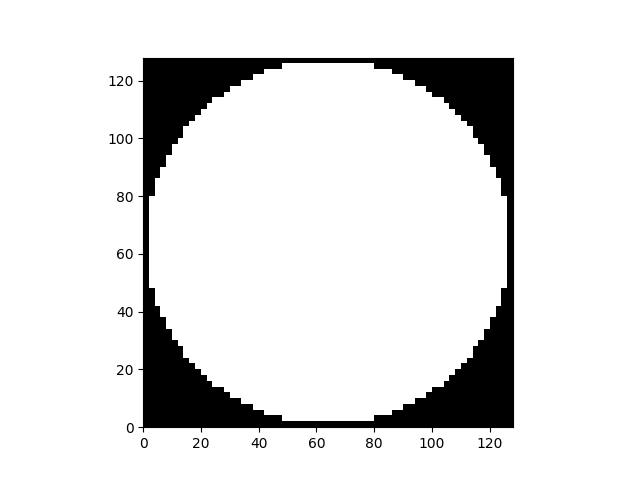

<IPython.core.display.Javascript object>


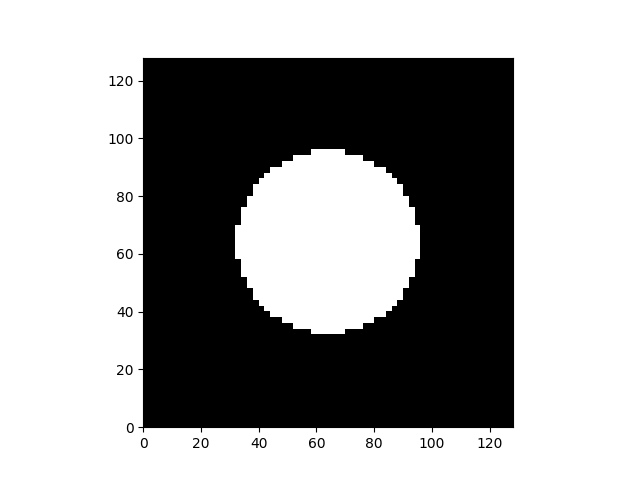

In [4]:
npix = 64
xsiz = 128
ysiz = 128

circ3 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.5, filename = None ,plotting=True );
circ4 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = None ,plotting=True );


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


<IPython.core.display.Javascript object>


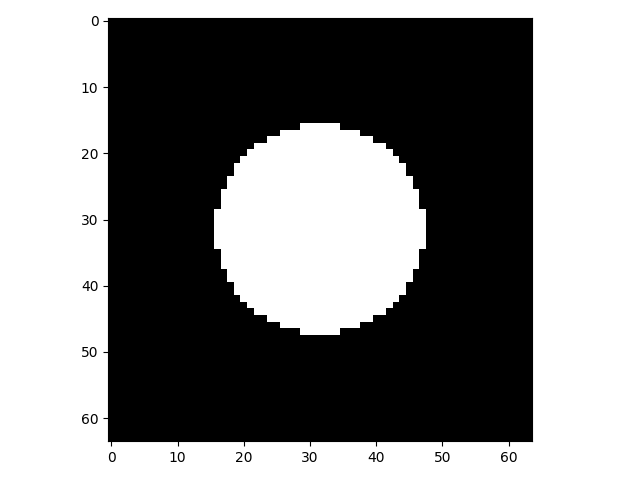

In [5]:
#make circular apertures (returns also the 2D array)
npix = 64
xsiz = 512
ysiz = 512

#Make grid, define only one grid (else if grid= None, it will be recalculated)
tgrid = moe.gen.makegrid(npix, xsiz, ysiz)

#circ = moe.gen.circ_mask(npix, xsiz, ysiz, partial =0.25, filename = "circ.png" , plotting=True, grid = tgrid );

###Careful, if using tgrid, need to match the grid with the values in which it is based on
#circx is the 2D array 
circx = moe.gen.circ_mask(npix, xsiz, ysiz, partial =0.25, filename = None , plotting=False, grid = tgrid );

#circular mask without giving the 
#circ2 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = "circ2.png" ,plotting=True )

print( circx)  

#show the mask
fig = plt.figure() 
plt.imshow(circx, cmap = plt.get_cmap("Greys")) 

plt.tight_layout()
plt.savefig("circx.png")


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


<IPython.core.display.Javascript object>


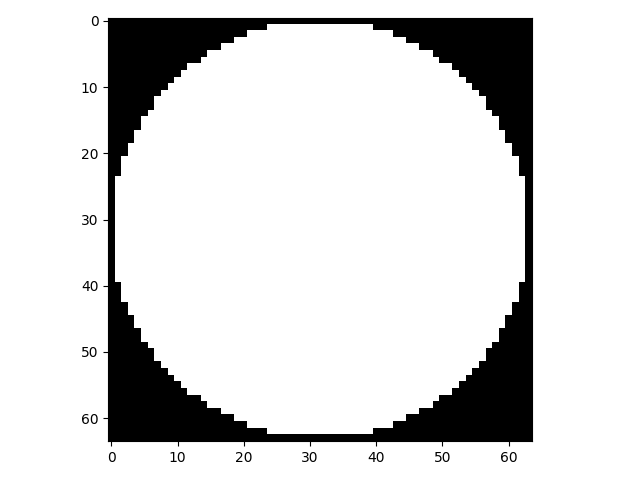

In [6]:
#npix = 64
#xsiz = 128
#ysiz = 128

circ3 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.5, filename = None ,plotting=False, grid = tgrid);
circ4 = moe.gen.circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = None ,plotting=False, grid = tgrid );

print( circ4)  

#show the mask via matplotlib 
fig = plt.figure() 
plt.imshow(circ3, cmap = plt.get_cmap("Greys")) 

plt.tight_layout()
plt.savefig("circ3.png")


## Rectangular aperture 

<IPython.core.display.Javascript object>


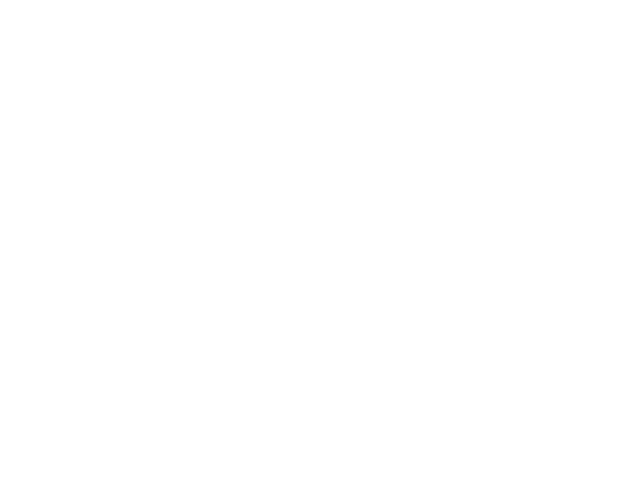

<IPython.core.display.Javascript object>


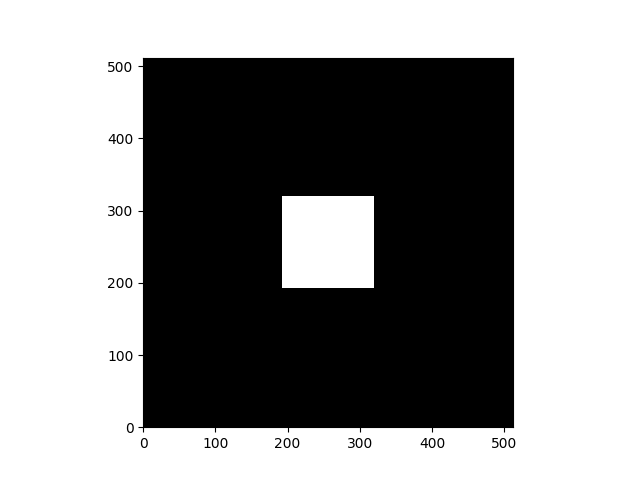

<IPython.core.display.Javascript object>


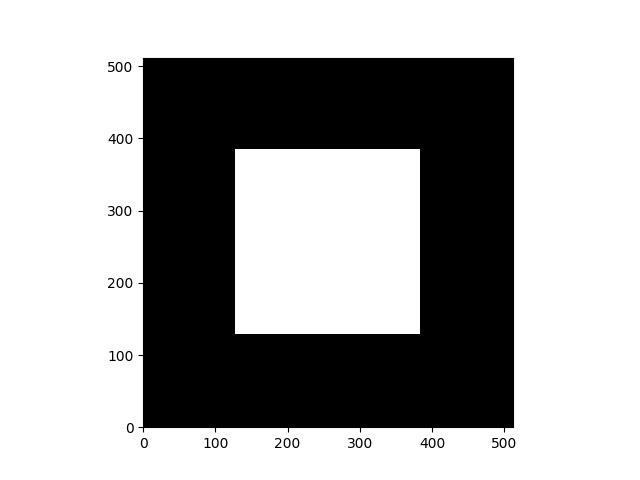

In [7]:
#npix = 128
#xsiz = 128
#ysiz = 128 

###Make rectangular aperture using the previous grid 
rect = moe.gen.rect_mask(npix, xsiz, ysiz, partial =0.25, filename= "rect.png", plotting=True, grid = tgrid )
rect2 = moe.gen.rect_mask(npix, xsiz, ysiz, partial =0.5, filename= None, plotting=True, grid = tgrid )


## Fresnel Zone Plate

<IPython.core.display.Javascript object>


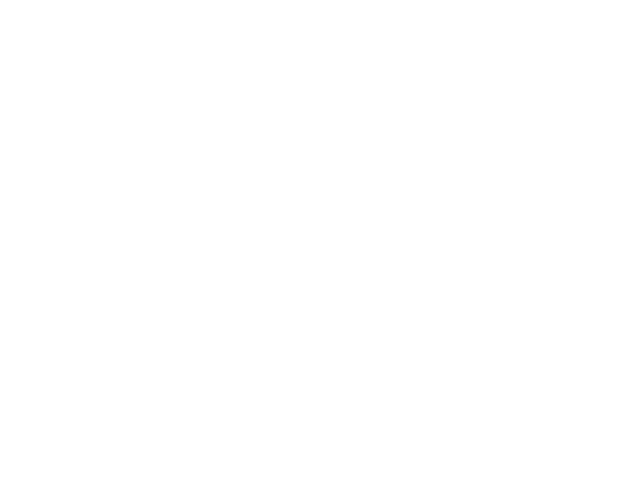

<IPython.core.display.Javascript object>


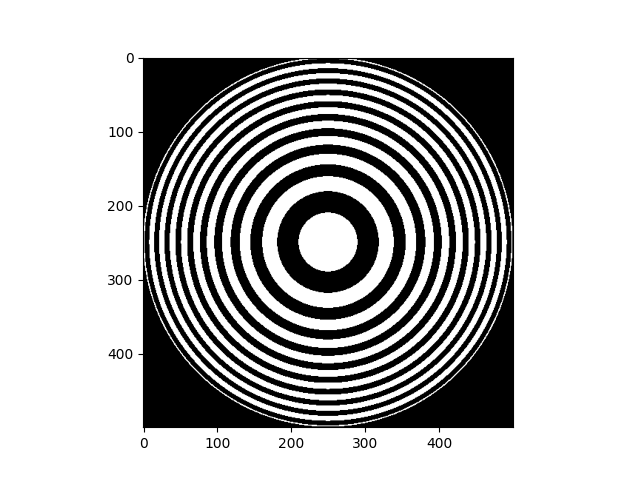

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [8]:
####generate a fresnel zone plate 

foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
npix = 500 # nr of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
imgname = 'fresnel_zone_plate.tiff' # name of gds file

#Make grid, define only one grid 
tgrid = moe.gen.makegrid(npix, xsiz, ysiz)

moe.gen.fzp_mask(npix, foc, lda, xsiz, ysiz, filename=imgname, plotting=True, grid = tgrid)

In [9]:
#Export the image into a gds  using export module 
infilxe = imgname
outfilxe = 'fresnel_zone_plate.gds'
pixelx = 1 #um 
pixely = 1 #um 
cellname = 'TOP'

moe.exp.grayim2gds(infilxe, outfilxe, pixelx, pixely,cellname, 0)

Exported the image file fresnel_zone_plate.tiff into fresnel_zone_plate.gds


## Fresnel phase mask

[-3.14158431e+00 -2.51326670e+00 -1.88494908e+00 -1.25663146e+00
 -6.28313844e-01  3.77342734e-06  6.28321391e-01  1.25663901e+00
  1.88495662e+00  2.51327424e+00  3.14159186e+00]


<IPython.core.display.Javascript object>


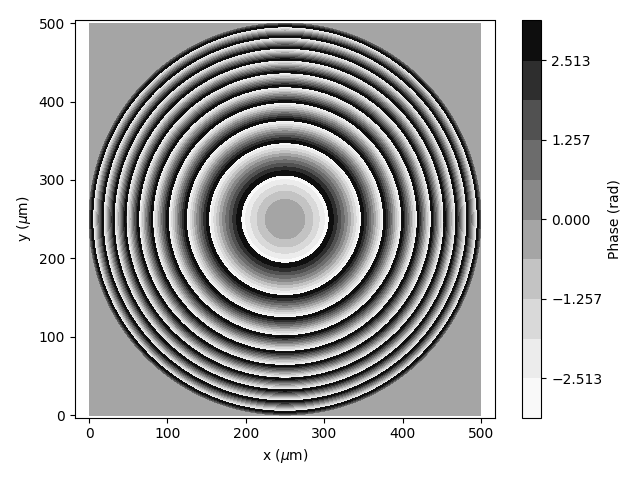

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
Saved the phase profile with 10 layers into the file fresnel_phase_mask.gds


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
####generate a fresnel phase mask and save it into gds  

npix = 5000 # nr of pixels 
foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
xsiz = 500 #x-size 
ysiz = 500 #y-size
n = 10  # number of gray levels 
gdsname = 'fresnel_phase_mask.gds' # name of gds file

#Make grid, define only one grid 
tgrid = moe.gen.makegrid(npix, xsiz, ysiz)

moe.gen.fresnel_phase_mask(npix, foc, lda, xsiz, ysiz, n, filename=gdsname, plotting=True, grid = tgrid)

## Generate phase mask from arbitrary phase function 

<IPython.core.display.Javascript object>


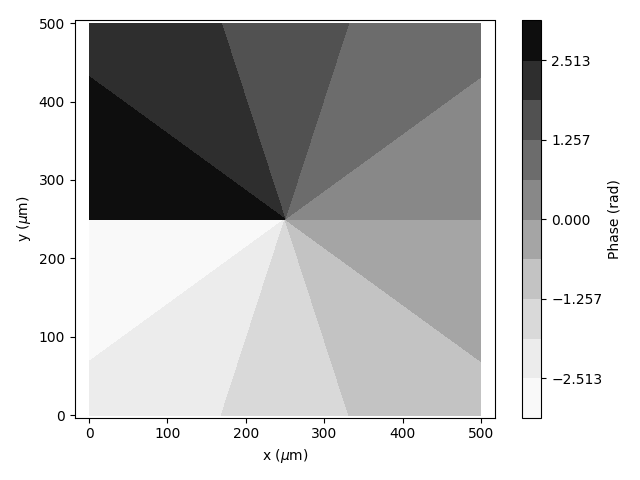

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
Saved the phase profile with 10 layers into the file spiral_phase_plate.gds


array([[-2.35619449, -2.35599441, -2.35579425, ..., -0.7857984 ,
        -0.78559824, -0.78539816],
       [-2.35639457, -2.35619449, -2.35599433, ..., -0.78559832,
        -0.78539816, -0.78519808],
       [-2.35659473, -2.35639465, -2.35619449, ..., -0.78539816,
        -0.785198  , -0.78499792],
       ...,
       [ 2.35659473,  2.35639465,  2.35619449, ...,  0.78539816,
         0.785198  ,  0.78499792],
       [ 2.35639457,  2.35619449,  2.35599433, ...,  0.78559832,
         0.78539816,  0.78519808],
       [ 2.35619449,  2.35599441,  2.35579425, ...,  0.7857984 ,
         0.78559824,  0.78539816]])

In [11]:
### Example with a spiral complex phase function 
#using the spiral function available in generate module 
from pyMOE.generate import * 

import numpy as np 

#attention, make sure to have enough pixels 
npix = 5000  # number of pixels 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
ltop = 1 #topological number

#spiral mask is defined as  
#spiral(x,y,x0,y0,ltop)

n =10 # number of gray levels 
gdsfile = "spiral_phase_plate.gds"  #name of gds file 

moe.gen.phase_mask('gdspy', npix, xsiz, ysiz,n, spiral, L=ltop, \
           filename=gdsfile, plotting=True ,prec = 1e-12, mpoints = 1e9, grid = tgrid)


<IPython.core.display.Javascript object>


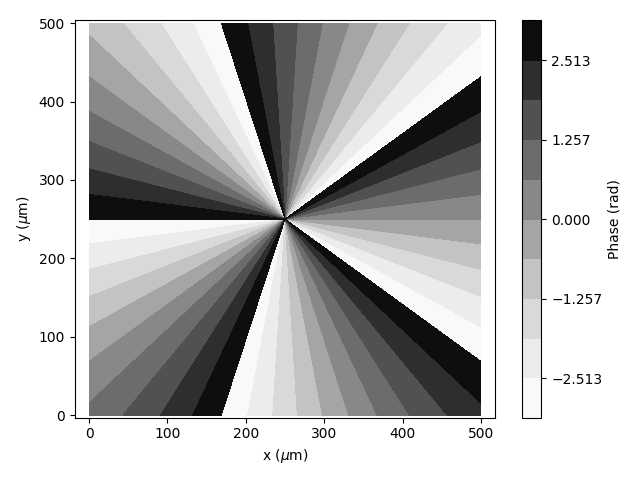

10
0
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
1
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
2
True
True
True
True
True
True
True
True
True
True
True
True
3
True
True
True
True
True
True
True
4
True
True
True
5
True
True
True
True
True
6
True
True
True
True
True
True
True
7
True
True
True
True
True
True
True
True
True
True
True
True
8
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
9
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Saved the phase profile with 10 layers into the file spiral_phase_plate5.gds


array([[ 0.78539816,  0.78639856,  0.78739936, ...,  2.35419329,
         2.35519409,  2.35619449],
       [ 0.78439776,  0.78539816,  0.78639896, ...,  2.35519369,
         2.35619449,  2.35719489],
       [ 0.78339696,  0.78439736,  0.78539816, ...,  2.35619449,
         2.35719529,  2.35819569],
       ...,
       [-0.78339696, -0.78439736, -0.78539816, ..., -2.35619449,
        -2.35719529, -2.35819569],
       [-0.78439776, -0.78539816, -0.78639896, ..., -2.35519369,
        -2.35619449, -2.35719489],
       [-0.78539816, -0.78639856, -0.78739936, ..., -2.35419329,
        -2.35519409, -2.35619449]])

In [12]:
ltop = 5
moe.gen.phase_mask('gdshelper', npix, xsiz, ysiz,n, spiral, L=ltop, \
           filename='spiral_phase_plate'+str(ltop)+'.gds', plotting=True ,prec = 1e-12, mpoints = 1e9, grid = tgrid)

<IPython.core.display.Javascript object>


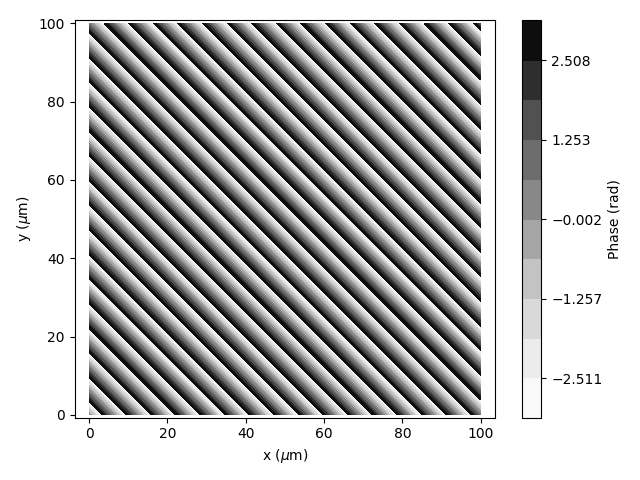

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
Saved the phase profile with 10 layers into the file arbitrary_function.gds


array([[ 0.13274123,  0.08271622,  0.0326912 , ...,  0.76375617,
         0.71373116,  0.66370614],
       [ 0.08271622,  0.0326912 , -0.01733381, ...,  0.71373116,
         0.66370614,  0.61368113],
       [ 0.0326912 , -0.01733381, -0.06735882, ...,  0.66370614,
         0.61368113,  0.56365612],
       ...,
       [ 0.76375617,  0.71373116,  0.66370614, ...,  1.39477111,
         1.3447461 ,  1.29472108],
       [ 0.71373116,  0.66370614,  0.61368113, ...,  1.3447461 ,
         1.29472108,  1.24469607],
       [ 0.66370614,  0.61368113,  0.56365612, ...,  1.29472108,
         1.24469607,  1.19467106]])

In [13]:
### Example with a function defined on the go
from pyMOE.generate import * 
import numpy as np 

npix = 2000  # number of pixels 
xsiz = 100 #x-size 
ysiz = 100 #y-size 


##Arbitrarily defined function for exemplification 
#corresponds to a blazed grating 
def fexample(x,y,x0,y0,a,b):
    """
    returns a COMPLEX function (the function to implement NEEDS to be complex to extract the phase!)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center 
    y0 = y-coordinate of center 
    a = arbitrary parameter
    b  = arbitrary parameter 
    """
    from numpy.random import default_rng
    
    sfunc = (- a * (x + y)  -b) 
    func = np.exp(1.0j*sfunc)

    return func

aval = 1
bval = 25
n = 10 # number of gray levels 
gdsfile = "arbitrary_function.gds"  #name of gds file 

#Let's iuse te 
moe.gen.phase_mask('gdspy',npix, xsiz, ysiz,n, fexample, a= aval, b = bval, \
           filename=gdsfile, plotting=True ,prec = 1e-9, mpoints = 1e9)

##careful, if using more precision than the availble in the grid, spurious points will be set at the grid side boundary 


<IPython.core.display.Javascript object>


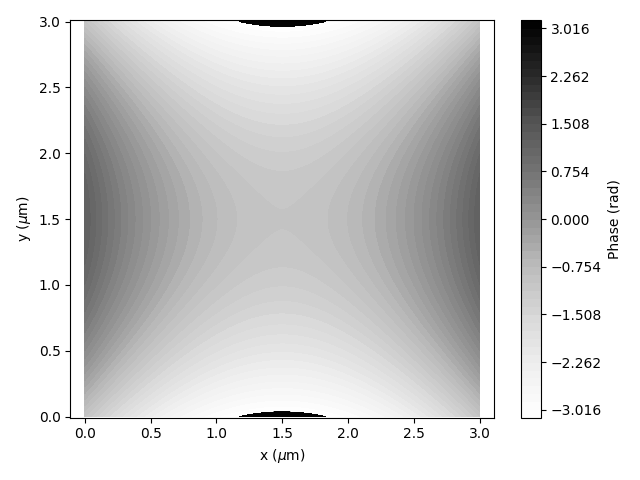

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Saved the phase profile with 50 layers into the file arbitrary_function_saddle.gds


array([[-1.        , -1.0018    , -1.00359928, ..., -1.00359928,
        -1.0018    , -1.        ],
       [-0.9982    , -1.        , -1.00179928, ..., -1.00179928,
        -1.        , -0.9982    ],
       [-0.99640072, -0.99820072, -1.        , ..., -1.        ,
        -0.99820072, -0.99640072],
       ...,
       [-0.99640072, -0.99820072, -1.        , ..., -1.        ,
        -0.99820072, -0.99640072],
       [-0.9982    , -1.        , -1.00179928, ..., -1.00179928,
        -1.        , -0.9982    ],
       [-1.        , -1.0018    , -1.00359928, ..., -1.00359928,
        -1.0018    , -1.        ]])

In [14]:
### Another example with a function defined on the go
from pyMOE.generate import * 
import numpy as np 

npix = 5000  # number of pixels 
xsiz = 3 #x-size 
ysiz = 3 #y-size 


##Arbitrarily defined function for exemplification 
#corresponds to a saddle surface 
def fexample(x,y,x0,y0,a,b):
    """
    returns a COMPLEX function (the function to implement NEEDS to be complex to extract the phase!)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center 
    y0 = y-coordinate of center 
    a = arbitrary parameter
    b  = arbitrary parameter 
    """
    from numpy.random import default_rng
    
    x = x-x0 
    y = y-y0
    sfunc =  (a * ((x*x - y*y)) -b) 
    func = np.exp(1.0j*sfunc)

    return func

aval = 1
bval = 1
xo = 1.5
yo = 1.5
n = 50 # number of gray levels 
gdsfile = "arbitrary_function_saddle.gds"  #name of gds file 


#Make grid, define only one grid (else, if only one is necessary, put None for the default)
tgrid = moe.gen.makegrid(npix, xsiz, ysiz)

#Let's iuse te 
moe.gen.phase_mask('gdspy',npix, xsiz, ysiz,n, fexample, a= aval, b = bval, \
           filename=gdsfile, plotting=True ,prec = 1e-9, mpoints = 1e9, grid = tgrid)

##careful, if using more precision than the availble in the grid, spurious points will be set at the grid side boundary 


<IPython.core.display.Javascript object>


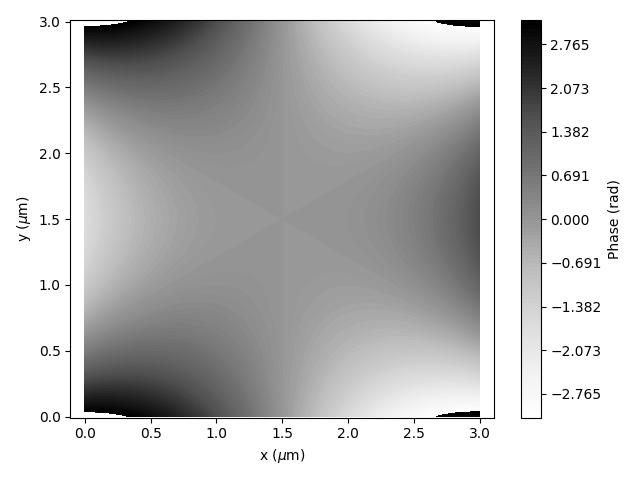

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saved the phase profile with 100 layers into the file arbitrary_function_msaddle.gds


array([[-2.90818531, -2.90818612, -2.90818855, ...,  2.90818855,
         2.90818612,  2.90818531],
       [-2.91223531, -2.9122345 , -2.91223531, ...,  2.91223531,
         2.9122345 ,  2.91223531],
       [-2.91628369, -2.91628126, -2.91628045, ...,  2.91628045,
         2.91628126,  2.91628369],
       ...,
       [-2.91628369, -2.91628126, -2.91628045, ...,  2.91628045,
         2.91628126,  2.91628369],
       [-2.91223531, -2.9122345 , -2.91223531, ...,  2.91223531,
         2.9122345 ,  2.91223531],
       [-2.90818531, -2.90818612, -2.90818855, ...,  2.90818855,
         2.90818612,  2.90818531]])

In [15]:
### Another example with a function defined on the go
from pyMOE.generate import * 
import numpy as np 

npix = 5000  # number of pixels 
xsiz = 3 #x-size 
ysiz = 3 #y-size 


##Arbitrarily defined function for exemplification 
#corresponds to a monkey saddle 
def fexample(x,y,x0,y0,a,b):
    """
    returns a COMPLEX function (the function to implement NEEDS to be complex to extract the phase!)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center 
    y0 = y-coordinate of center 
    a = arbitrary parameter
    b  = arbitrary parameter 
    """
    from numpy.random import default_rng
    
    x = x-x0 
    y = y-y0
    sfunc =  (a * ((x*x*x- 3*x*y*y)) -b) 
    func = np.exp(1.0j*sfunc)

    return func

aval = 0.5
bval = 0
xo = 1.5
yo = 1.5
n = 100 # number of gray levels 
gdsfile = "arbitrary_function_msaddle.gds"  #name of gds file 


#Make grid, define only one grid (else, if only one is necessary, put None for the default)
tgrid = moe.gen.makegrid(npix, xsiz, ysiz)

#Let's iuse te 
moe.gen.phase_mask('gdspy',npix, xsiz, ysiz,n, fexample, a= aval, b = bval, \
           filename=gdsfile, plotting=True ,prec = 1e-9, mpoints = 1e9, grid = tgrid)

##careful, if using more precision than the availble in the grid, spurious points will be set at the grid side boundary 


<IPython.core.display.Javascript object>


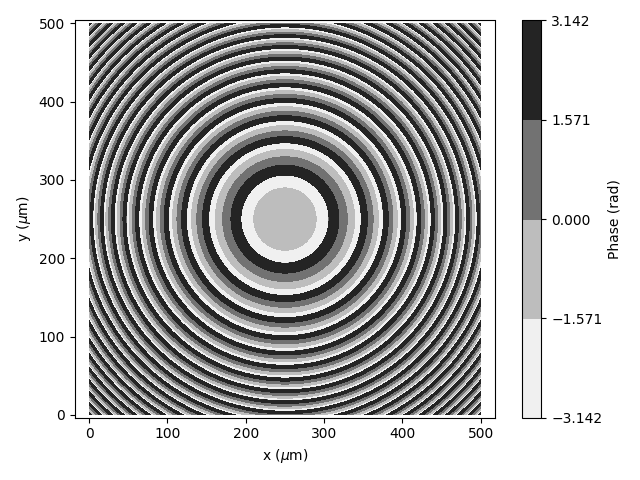

Passing contours into GDS. 
0
1
2
3
Saved the phase profile with 5 layers into the file fresnel_phase_plate_selecrad.gds


array([[1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       ...,
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892]])

In [16]:
#Select exact position of contours  in phase 

phas_vals = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]

moe.gen.phase_mask('gdspy',5000, 500,500, len(phas_vals),\
           lensfres, fo=5000, lda=0.6328, \
           filename="fresnel_phase_plate_selecrad.gds", plotting=True ,\
                   prec = 1e-6, mpoints = 1e9, zlevs =phas_vals    )

<IPython.core.display.Javascript object>


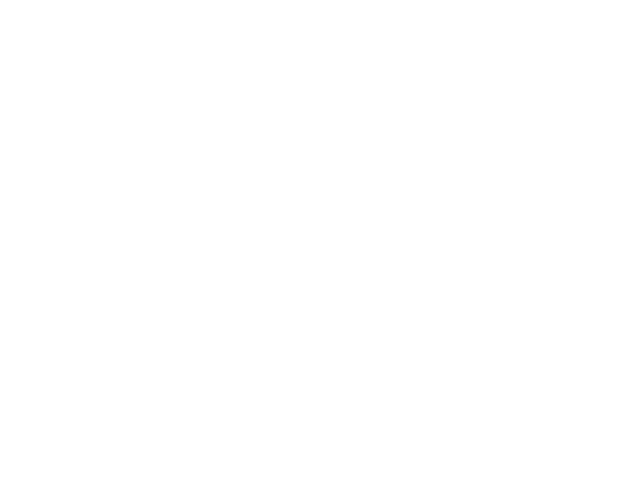

<IPython.core.display.Javascript object>


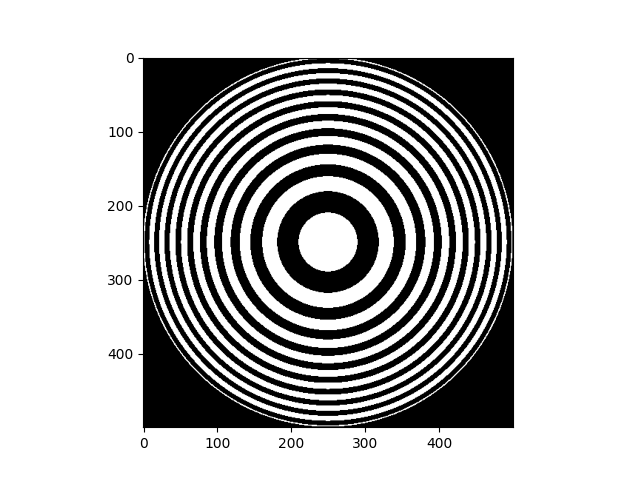

<IPython.core.display.Javascript object>


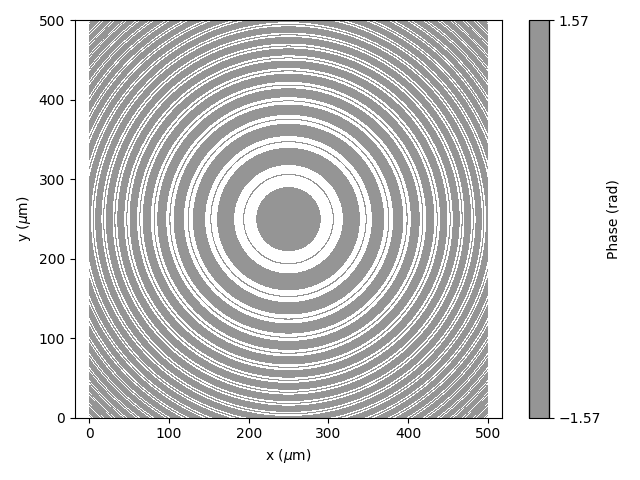

Passing contours into GDS. 
0
Saved the phase profile with 2 layers into the file fresnel_phase_plate_selecrad.gds


array([[1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       ...,
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892]])

In [17]:
####generate a fresnel zone plate  and compare with the obtained when selecting the phases 

npix = 500 # nr of pixels 
foc = 5000 # focal distance in um 
ldar = 0.6328 #wavelength in um 
xsiz = 500 #x-size 
ysiz = 500 #y-size 
imgname = 'fresnel_zone_plate.tiff' # name of gds file

moe.gen.fzp_mask(npix, foc, lda, xsiz, ysiz, filename=imgname, plotting=True)

phas_vals = [-np.pi/2, np.pi/2]

moe.gen.phase_mask('gdspy', foc, xsiz,ysiz, len(phas_vals),\
           lensfres, fo=foc, lda=ldar, \
           filename="fresnel_phase_plate_selecrad.gds", plotting=True ,\
                   prec = 1e-6, mpoints = 1e9, zlevs =phas_vals    )

<IPython.core.display.Javascript object>


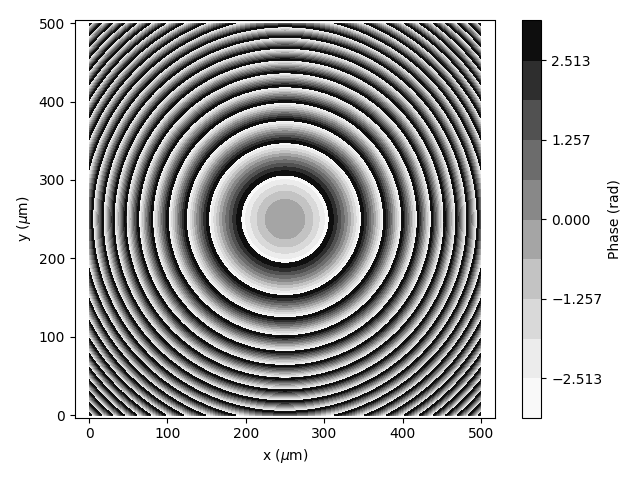

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
Saved the phase profile with 11 layers into the file fresnel_phase_plate_selecrad2.gds


array([[1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       ...,
       [1.8027337 , 1.85225607, 1.90175868, ..., 1.90175868, 1.85225607,
        1.8027337 ],
       [1.75323119, 1.80275352, 1.85225607, ..., 1.85225607, 1.80275352,
        1.75323119],
       [1.70370892, 1.75323119, 1.8027337 , ..., 1.8027337 , 1.75323119,
        1.70370892]])

In [18]:
#position of the contours in phase
phas2 = np.linspace(-np.pi, np.pi, 11 )


moe.gen.phase_mask('gdspy', 5000, 500,500,len(phas2),\
           lensfres, fo=5000, lda=0.6328, \
           filename="fresnel_phase_plate_selecrad2.gds",\
                plotting=True ,prec = 1e-6, mpoints = 1e9, zlevs = phas2)

## Extra: correct the .gds file to make sure the layers do not overlap 

In [19]:
import pyMOE.gds_klops as gdsops 
import numpy as np 
n=10 

gdsfile = "arbitrary_function.gds"  #name of gds file 
cellname = 'TOP'

#The layerspol1 will be subtracted in layerspol2 
layerspol1 = np.flip(np.arange(0,n))
datatypes1 = np.zeros(len(layerspol1))
layerspol2 = layerspol1 +1 
datatypes2 = np.zeros(len(layerspol2))

outfile = "arbitrary_function_sub.gds"

moe.gdsops.diffs_layers_arrays(gdsfile, cellname, layerspol1, datatypes1, layerspol2, datatypes2, outfile)

[8 7 6 5 4 3 2 1 0]
8
7
6
5
4
3
2
1
0
[7 6 5 4 3 2 1 0]
7
6
5
4
3
2
1
0
[6 5 4 3 2 1 0]
6
5
4
3
2
1
0
[5 4 3 2 1 0]
5
4
3
2
1
0
[4 3 2 1 0]
4
3
2
1
0
[3 2 1 0]
3
2
1
0
[2 1 0]
2
1
0
[1 0]
1
0
[0]
0
Substracted [9 8 7 6 5 4 3 2 1 0] in [10  9  8  7  6  5  4  3  2  1] of the file arbitrary_function.gds
Saved the result to arbitrary_function_sub.gds


## Extra: Zernike polynomials mask + correcting the closed shapes on the contour

In [20]:
#Zernike polynomial from https://github.com/jacopoantonello/zernike 

def makezernike(x,y,x0,y0,L,K, num):
    import numpy as np
    import matplotlib.pyplot as plt
    from zernike import RZern

    cart = RZern(num)

    ddx = np.linspace(-1.0, 1.0, K)
    ddy = np.linspace(-1.0, 1.0, L)
    xv, yv = np.meshgrid(ddx, ddy)
    cart.make_cart_grid(xv, yv)

    c = np.zeros(cart.nk)
  
    for i in range(num, num+1):
        plt.subplot(1, 1,1)
        c *= 0.0
        c[i] = 1.0
        Phik = cart.eval_grid(c, matrix=True)
        
        ephik = np.exp( Phik*1.0j*0.55 ) 
        
        
        mphi = np.arctan2( np.imag(ephik) , np.real(ephik))
        mphi = np.nan_to_num(mphi, copy=True, nan=0.0, posinf=None, neginf=None)
        return mphi 

<IPython.core.display.Javascript object>


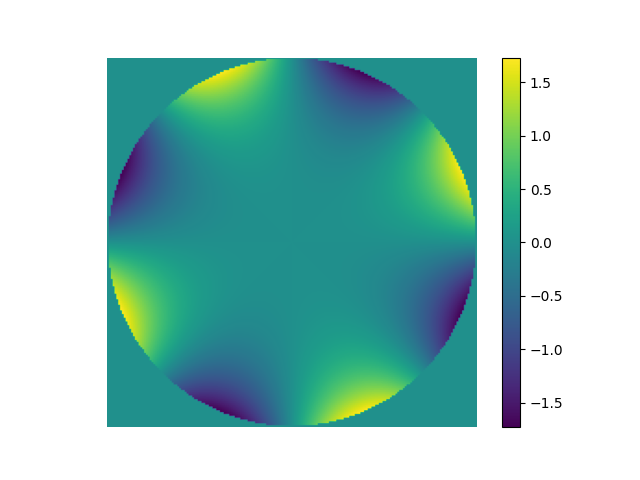

In [21]:
phik = makezernike(1,1,1,1,200,200, 14)
plt.figure() 
#mzern = np.arctan2( np.imag(phik) , np.real(phik))
plt.imshow(phik, origin='lower', extent=(-1, 1, -1, 1))
plt.axis('off')
plt.colorbar()


<IPython.core.display.Javascript object>


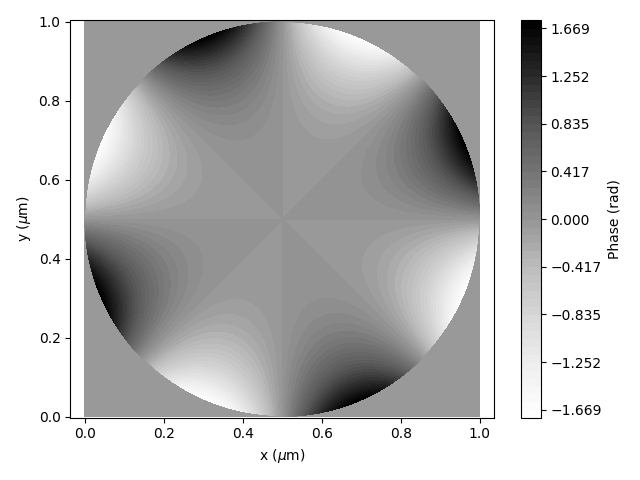

Passing contours into GDS. 
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Saved the phase profile with 50 layers into the file arbitrary_function_zernike.gds


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
### Another example with a function defined on the go
from pyMOE.generate import * 
import numpy as np 

npix = 2000  # number of pixels 
xsiz = 1 #x-size 
ysiz = 1 #y-size 

aval = 0.5
bval = 0
xo = 1.5
yo = 1.5
n =50 # number of gray levels 
gdsfile = "arbitrary_function_zernike.gds"  #name of gds file 


#Make grid, define only one grid (else, if only one is necessary, put None for the default)
tgrid = moe.gen.makegrid(npix, xsiz, ysiz)


#Let's iuse t
moe.gen.layer_mask('gdspy',npix, xsiz, ysiz,n, makezernike, L=npix, K=npix, num=14, \
           filename=gdsfile, plotting=True ,prec = 1e-9, mpoints = 1e9)

##careful, if using more precision than the availble in the grid, spurious points will be set at the grid side boundary 


In [28]:
####Adhoc correction on the levels of the zernike polynomial due to overlapping closed forms 

import pyMOE.gds_klops as gdsops 
import numpy as np 
n=50

gdsfile = "arbitrary_function_zernike.gds"  #name of gds file 
cellname = 'TOP'

#The layerspol1 will be subtracted in layerspol2 
#layerspol1 = np.flip(np.arange(0,n/2))
layerspol1 = np.arange(0, n/2-1)
datatypes1 = np.zeros(len(layerspol1))
layerspol2 = layerspol1 +1
datatypes2 = np.zeros(len(layerspol2))

outfile = "arbitrary_function_zernike_sub.gds"

moe.gdsops.diffs_layers_arrays(gdsfile, cellname, layerspol1, datatypes1, layerspol2, datatypes2, outfile)



gdsfile = "arbitrary_function_zernike_sub.gds"  #name of gds file 
cellname = 'TOP'

#The layerspol1 will be subtracted in layerspol2 
#layerspol1 = np.flip(np.arange(0,n/2))
layerspol1 = np.arange(n/2, n)
layerspol1 = np.flip(layerspol1)
datatypes1 = np.zeros(len(layerspol1))
layerspol2 = np.ones(len(layerspol1)) * (n/2  -1)
datatypes2 = np.zeros(len(layerspol2))

outfile = "arbitrary_function_zernike_sub.gds"

moe.gdsops.diffs_layers_arrays(gdsfile, cellname, layerspol1, datatypes1, layerspol2, datatypes2, outfile)



gdsfile = "arbitrary_function_zernike_sub.gds"  #name of gds file 
cellname = 'TOP'

#The layerspol1 will be subtracted in layerspol2 
#layerspol1 = np.flip(np.arange(0,n/2))
layerspol1 = np.arange(n/2+1, n)
layerspol1 = np.flip(layerspol1)
datatypes1 = np.zeros(len(layerspol1))
layerspol2 = np.ones(len(layerspol1)) * (n/2 )
datatypes2 = np.zeros(len(layerspol2))

outfile = "arbitrary_function_zernike_sub.gds"

moe.gdsops.diffs_layers_arrays(gdsfile, cellname, layerspol1, datatypes1, layerspol2, datatypes2, outfile)


gdsfile = "arbitrary_function_zernike_sub.gds"  #name of gds file 
cellname = 'TOP'

#The layerspol1 will be subtracted in layerspol2 
#layerspol1 = np.flip(np.arange(0,n/2))
for lyr, layer in enumerate(np.arange(int(n/2+3), n) ): 
    layerspol1 = np.arange(int(n/2+3)+lyr, n)
    layerspol1 = np.flip(layerspol1)
    datatypes1 = np.zeros(len(layerspol1))
    layerspol2 = np.ones(len(layerspol1)) * (layer-1)
    datatypes2 = np.zeros(len(layerspol2))

    outfile = "arbitrary_function_zernike_sub.gds"

    if lyr==0:
        moe.gdsops.diffs_layers_arrays(gdsfile, cellname, layerspol1, datatypes1, layerspol2, datatypes2, outfile)
    else:  
        moe.gdsops.diffs_layers_arrays(outfile, cellname, layerspol1, datatypes1, layerspol2, datatypes2, outfile)

[0.]
0.0
[1. 0.]
1.0
0.0
[2. 1. 0.]
2.0
1.0
0.0
[3. 2. 1. 0.]
3.0
2.0
1.0
0.0
[4. 3. 2. 1. 0.]
4.0
3.0
2.0
1.0
0.0
[5. 4. 3. 2. 1. 0.]
5.0
4.0
3.0
2.0
1.0
0.0
[6. 5. 4. 3. 2. 1. 0.]
6.0
5.0
4.0
3.0
2.0
1.0
0.0
[7. 6. 5. 4. 3. 2. 1. 0.]
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
[8. 7. 6. 5. 4. 3. 2. 1. 0.]
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
[9. 8. 7. 6. 5. 4. 3. 2. 1. 0.]
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
[11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
11.0
10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
[12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
12.0
11.0
10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
[13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
13.0
12.0
11.0
10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
[14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]
14.0
13.0
12.0
11.0
10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
[15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  

30
29
28
[47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28]
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
[46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28]
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
[45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28]
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
[44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28]
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
[43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28]
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
[42 41 40 39 38 37 36 35 34 33 32 31 30 29 28]
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
[41 40 39 38 37 36 35 34 33 32 31 30 29 28]
41
40
39
38
37
36
35
34
33
32
31
30
29
28
[40 39 38 37 36 35 34 33 32 31 30 29 28]
40
39
38
37
36
35
34
33
32
31
30
29
28
[39 38 37 36 35 34 33 32 31 30 29 28]
39
38
37
36
35
34
33
32
31
30
29
28
[38 37 36 35 34 33 32 31 30 29 28]
38
37
36
35
34
33
32
31
30
29
28
[37 36 35 34 33 32 31 30 29 28]
37
36
35


[46 45 44 43 42 41 40 39 38 37 36 35 34]
46
45
44
43
42
41
40
39
38
37
36
35
34
[45 44 43 42 41 40 39 38 37 36 35 34]
45
44
43
42
41
40
39
38
37
36
35
34
[44 43 42 41 40 39 38 37 36 35 34]
44
43
42
41
40
39
38
37
36
35
34
[43 42 41 40 39 38 37 36 35 34]
43
42
41
40
39
38
37
36
35
34
[42 41 40 39 38 37 36 35 34]
42
41
40
39
38
37
36
35
34
[41 40 39 38 37 36 35 34]
41
40
39
38
37
36
35
34
[40 39 38 37 36 35 34]
40
39
38
37
36
35
34
[39 38 37 36 35 34]
39
38
37
36
35
34
[38 37 36 35 34]
38
37
36
35
34
[37 36 35 34]
37
36
35
34
[36 35 34]
36
35
34
[35 34]
35
34
[34]
34
[]
Substracted [49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34] in [33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33. 33.] of the file arbitrary_function_zernike_sub.gds
Saved the result to arbitrary_function_zernike_sub.gds
[48 47 46 45 44 43 42 41 40 39 38 37 36 35]
48
47
46
45
44
43
42
41
40
39
38
37
36
35
[47 46 45 44 43 42 41 40 39 38 37 36 35]
47
46
45
44
43
42
41
40
39
38
37
36
35
[46 45 44 43 42 41 40 39 3